# Hands-On Exercise 5.1:
# Decision Tree Classifiers
***

## Objectives

#### In this exercise, you will perform classification on structured data in Python. This exercise allows you to define a classification model on training data and evaluate the model against training data. The goal is to show you that classification models are typically built and tested before deployment.

### Overview

You will work on data detailing customer churn. You will:<br>
● Build a decision tree against a subset of the data (the training data)<br>
● Test the model against the remaing test data<br><br>

**Major Step 1: Data loading and exploration**

1. ❏ Import the **pandas** library. Import data from the file **custchurn.csv** and preview it

In [ ]:
import pandas as pd
data = pd.read_csv('custchurn.csv')
data.head()

2. ❏ Examine the number of churners vs. non-churners in the data.

In [ ]:
data['churn'].value_counts()/data['churn'].count()

**Major Step 2: Splitting the data set into training and test data**

3. ❏ Randomize the data set<br><br>
*Hint: You will need to import the Numpy library*

In [ ]:
import numpy as np
data_rand = data.iloc[np.random.RandomState(seed=0).permutation(len(data))]

4. ❏ Examine the first few rows in the randomized data set and compare to the
original.

In [ ]:
data.head()

In [ ]:
data_rand.head()

5. ❏ Remove the state and area_code columns from the randomized data set.

In [ ]:
drop = ['state','area_code']
data_rand = data_rand.drop(drop,axis=1)

6. ❏ Recode the binary columns international_plan and voice_mail_plan.

In [ ]:
yes_no_cols = ['international_plan','voice_mail_plan']
data_rand[yes_no_cols] = data_rand[yes_no_cols] == 'yes'
data_rand.head()

7. ❏ Split the data into 90 percent training data and 10 percent test data.

In [ ]:
train = data_rand[0:4500]
test = data_rand[4501:5000]

8. ❏ Check that the proportion of classes in the target value has been maintained in
both the training and test data.

In [ ]:
train["churn"].value_counts() / train["churn"].count()

In [ ]:
test["churn"].value_counts() / test["churn"].count()

**Major Step 3: Building the classification model**

9. ❏ Specify the target and predictor variables.

In [ ]:
target = train.churn
preds = train.drop('churn', axis=1)

10. ❏ Import **tree** and **export_graphviz** from sklearn

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz

11. ❏ Build the classification model, storing it in a variable called *clf*

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(preds, target)

12. ❏ Examine the model by typing its variable name *clf*

In [ ]:
clf

13. ❏ How many features (variables) were used to create the classifier?<br><br>
*Hint: Use the attribute **.n_features_** to see the number of features*

In [ ]:
clf.n_features_

14. ❏ Determine which are the most important attributes in the model with the attribute **.features_importances_**

In [ ]:
pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = preds.columns).sort_values(['Imp'], ascending = False)

14. ❏ Generate a graphic of the decision tree.

In [ ]:
with open('tree.dot', 'w') as dotfile: 
    export_graphviz(clf, 
                    dotfile, 
                    feature_names=preds.columns)

To view the graph, open a browser and navigate to url:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://www.webgraphviz.com/

Copy and paste the text from the newly generated file in step 14, **tree.dot** that has been created in your working directory **C:\1264**, into the text area, to view the decision tree

**Major Step 4: Testing the classification model**

14. ❏ Apply the decision tree model to the test data.

In [ ]:
testTarget = test.churn
testPreds = test.drop('churn', axis=1)
target_pred = clf.predict(testPreds)

15. ❏ Compare the vector of predicted class values to the actual class values.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testTarget, target_pred)

How accurate is the model when performed on the test data?

What was the error rate?

## <center>**Congratulations! You have successfully built and tested a classification model to predict whether customers are going to churn.**</center>

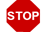

# <center>**This is the end of the exercise.**</center>